In [1]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import cv2
import random


In [2]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("bdd100k_train", {}, "/projectnb/cs585bp/hsharma/bdd100k_converted/bdd/labels/ins_seg/polygons/ins_seg_train_cocoformat.json", "/projectnb/cs585bp/hsharma/bdd100k_converted/bdd/images/10k/train")
register_coco_instances("bdd100k_val", {}, "/projectnb/cs585bp/hsharma/bdd100k_converted/bdd/labels/ins_seg/polygons/ins_seg_val_cocoformat.json", "/projectnb/cs585bp/hsharma/bdd100k_converted/bdd/images/10k/val")

In [3]:
bdd100k_meta = MetadataCatalog.get('bdd100k_train')
dataset_dicts = DatasetCatalog.get("bdd100k_train")

In [4]:
import matplotlib.pyplot as plt
import os

/projectnb/cs585bp/hsharma/bdd100k_converted/bdd/images/10k/train/71204607-fe7dbf99.jpg


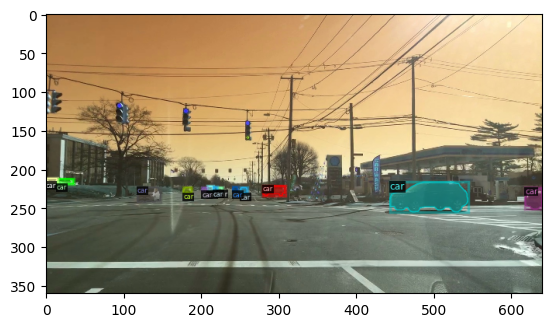

In [6]:
for d in random.sample(dataset_dicts, 1):
    if not os.path.exists(d['file_name']):
        print(f"skipped {d['file_name']}")
        continue
    print(d['file_name'])
    # res = re.findall("/projectnb/cs585bp/hsharma/bdd100k/coco/train2017/([0-9a-z]+)-[a-z0-9]+.jpg",d['file_name'])[0]
    # fn = d['file_name'][:-21]+res + d['file_name'][-22:]
    # print(d['file_name'])
    img = cv2.imread(d['file_name'])
    visualizer = Visualizer(img[:, :, ::-1], metadata=bdd100k_meta , scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])